# Causal Discovery : Does the Cockerel Crowing Cause the Sun to Rise?

## 10 Lines of Python code to automate causal discovery that you have got to see! 

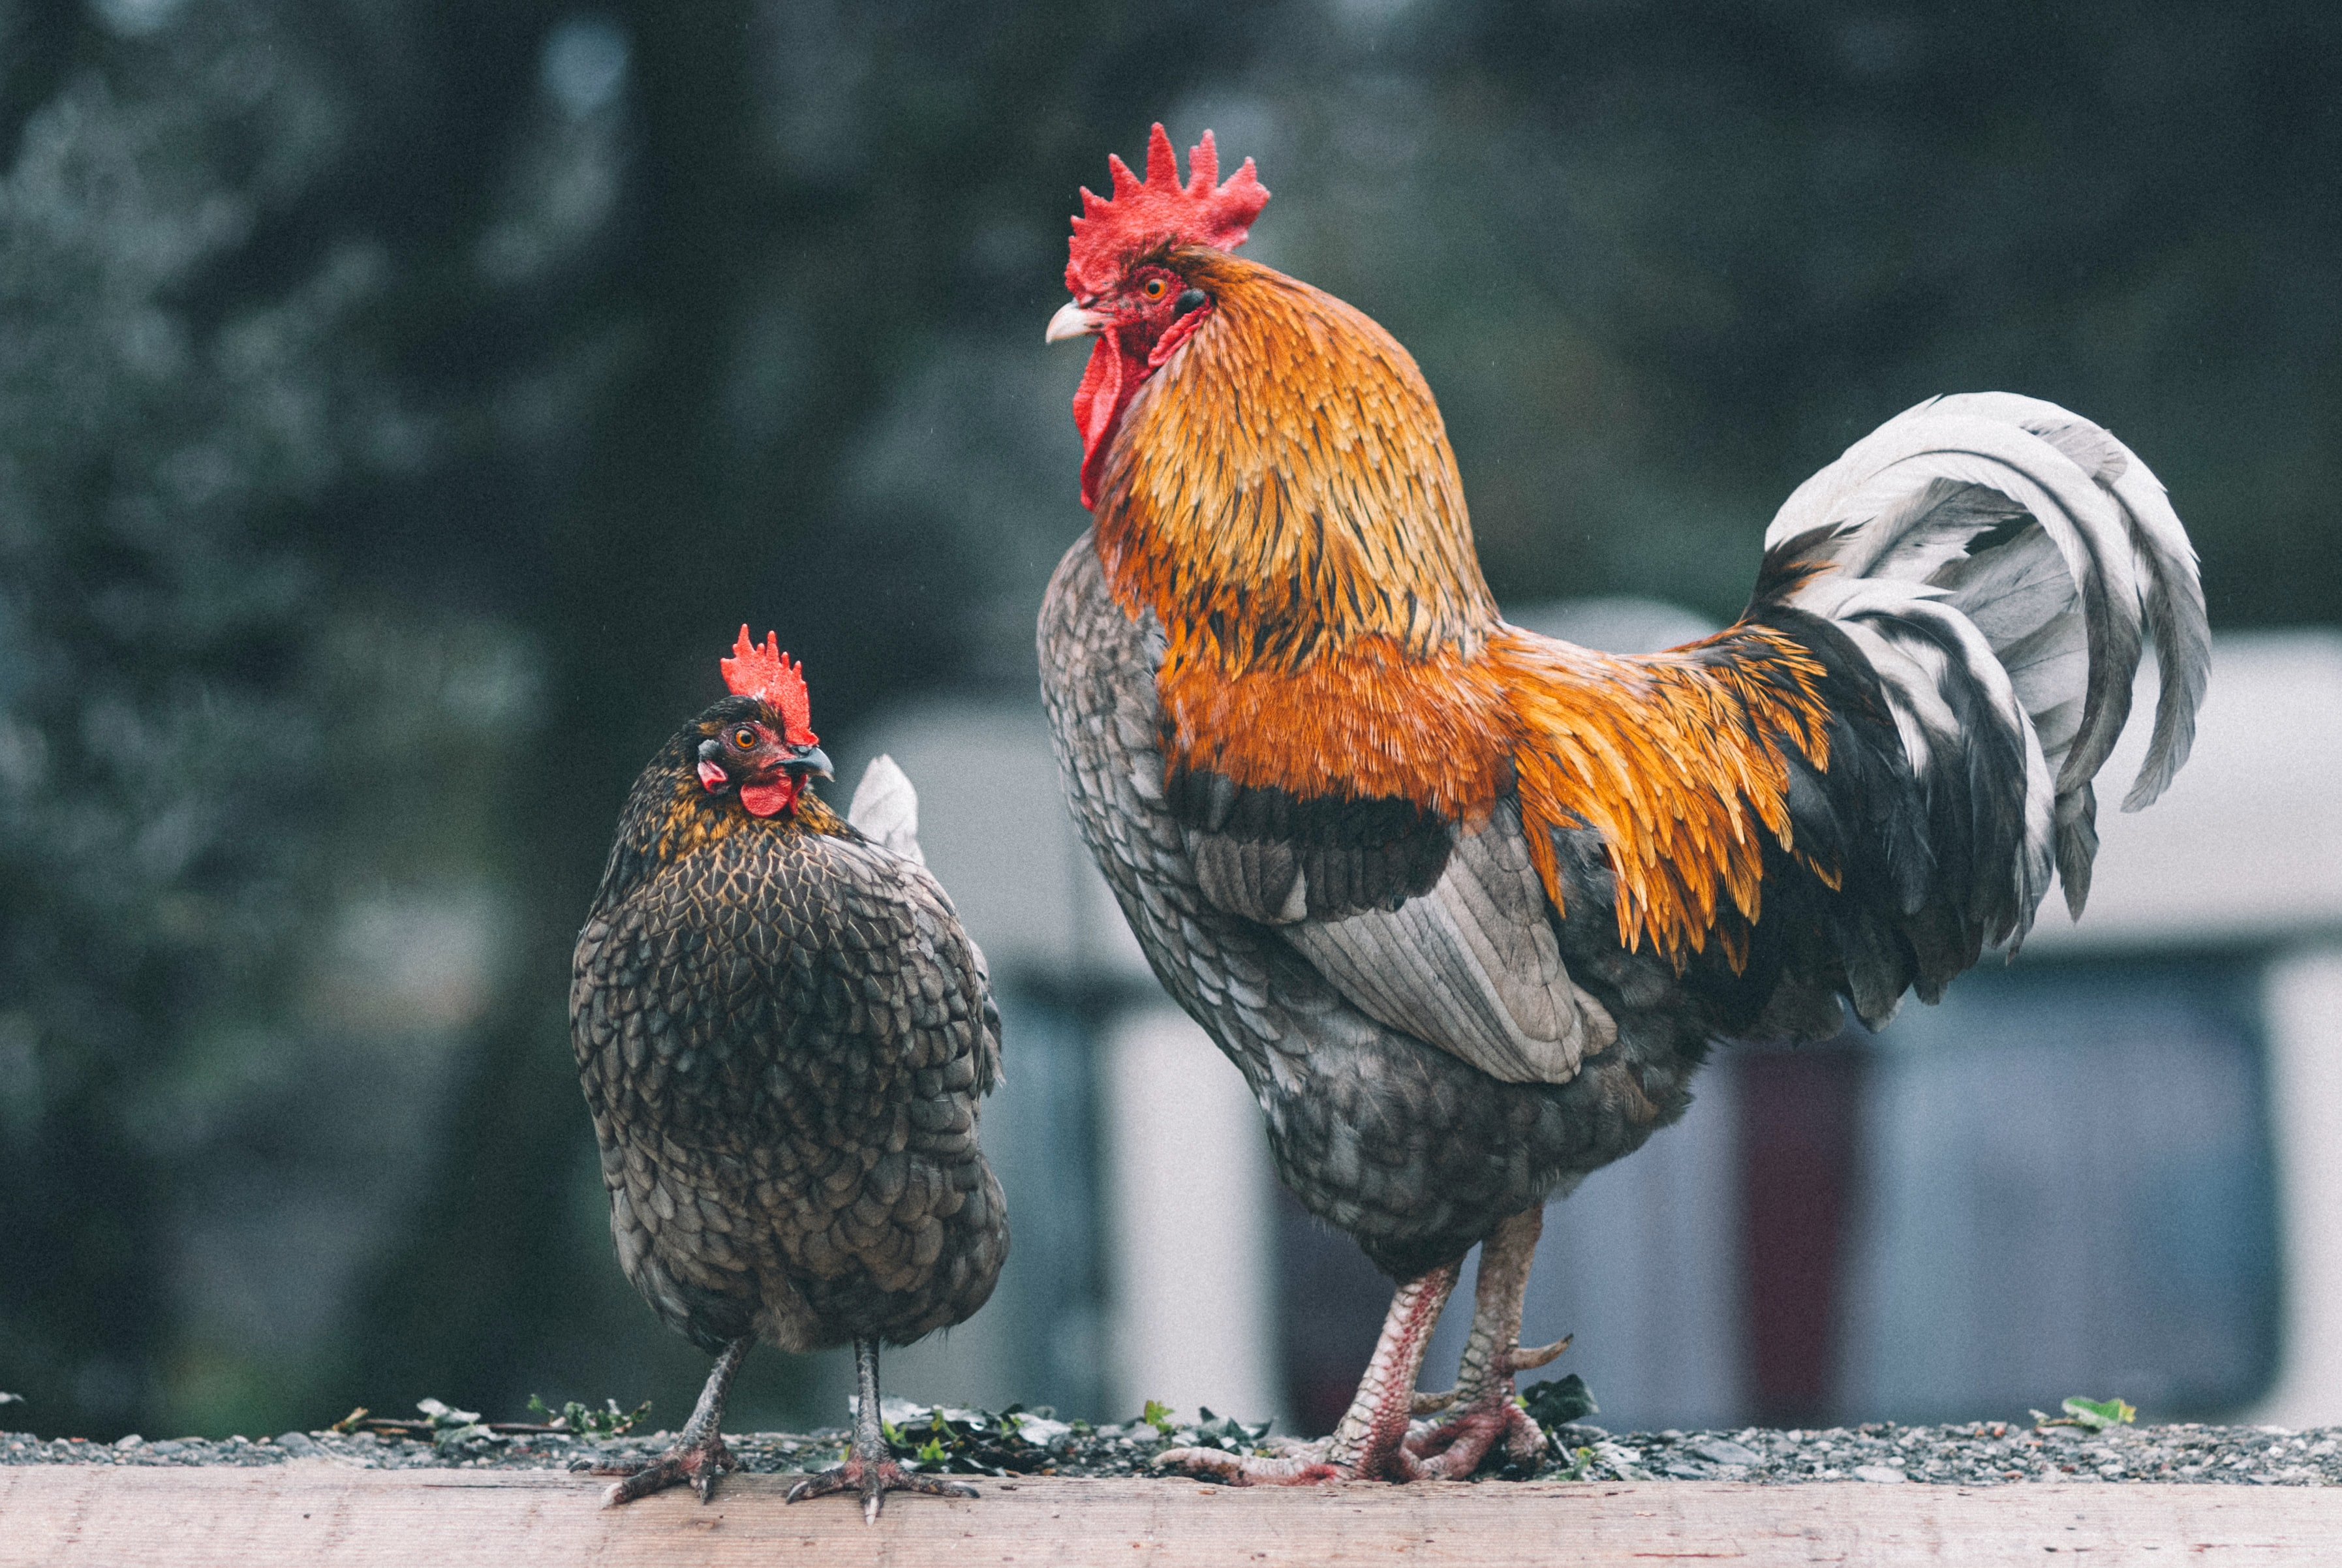

Photo by <a href="https://unsplash.com/@vonshnauzer?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Egor Myznik</a> on <a href="https://unsplash.com/images/animals/chicken?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Introduction

The focus of my recent research has been <b>causal inference</b> driven by the increasing requests I get from customers to move beyond machine learning predictions to answering "what-if?" type questions to drive impact and outcomes.

One of the things that intrigued me initially was - "How are causal diagrams constructed?". In many of the online examples they seem to spring into life fully formed with no explanation of how the nodes and links were identified.

This led me to read "The Book of Why" by Judea Pearl and Dana Mackenzie (several times!) and one view expressed is that you cannot reverse engineer a causal diagram, also known as a Directed Acyclic Graph (DAG) from the data alone. 

Data can reveal correlation but not causation, so how is it possible to "discover" causation?

<i><b>Please note that all the data sets in this artice were either created by the author or obtained from sources that grant a public use license.</b></i>

### Can Causality be Established from the Data?

Consider the value counts from the following binary data set ...

In [1]:
import pandas as pd
import numpy as np

df_sun_cockerel = pd.read_csv("data/sun_cockerel.csv")
df_sun_cockerel.value_counts().reset_index().rename({0:"Count"}, axis=1)

Sun Rises?  Cock Crows?   Count
0           1            1  902500
1           0            1   50000
2           1            0   47500

We can see that the cockerel crows when the sun rises in 90.25% of observations but how do we know if the sun rise causes the cock to crow or the cockerel crowing causes the sun to rise based on the data alone?

The number of instances when the cockerel crows when the sun isn't rising or when the sun rises but the cockerel stays silent are virtually identical (50,000 vs. 47,500) so the causal answer cannot be found by comparing the relative volumes of data.

One approach could be to look at the the temporal aspect. If the sun rises consistently before the cockerel crows that will be a good indicator of causality but what if our cockerel is an early riser?

The answer is to consult the domain experts. If we could assemble a team with an astrologer, a physicist and a poultry farmer they would conclude that the sun is causing the cockerel to crow and not the other way around!

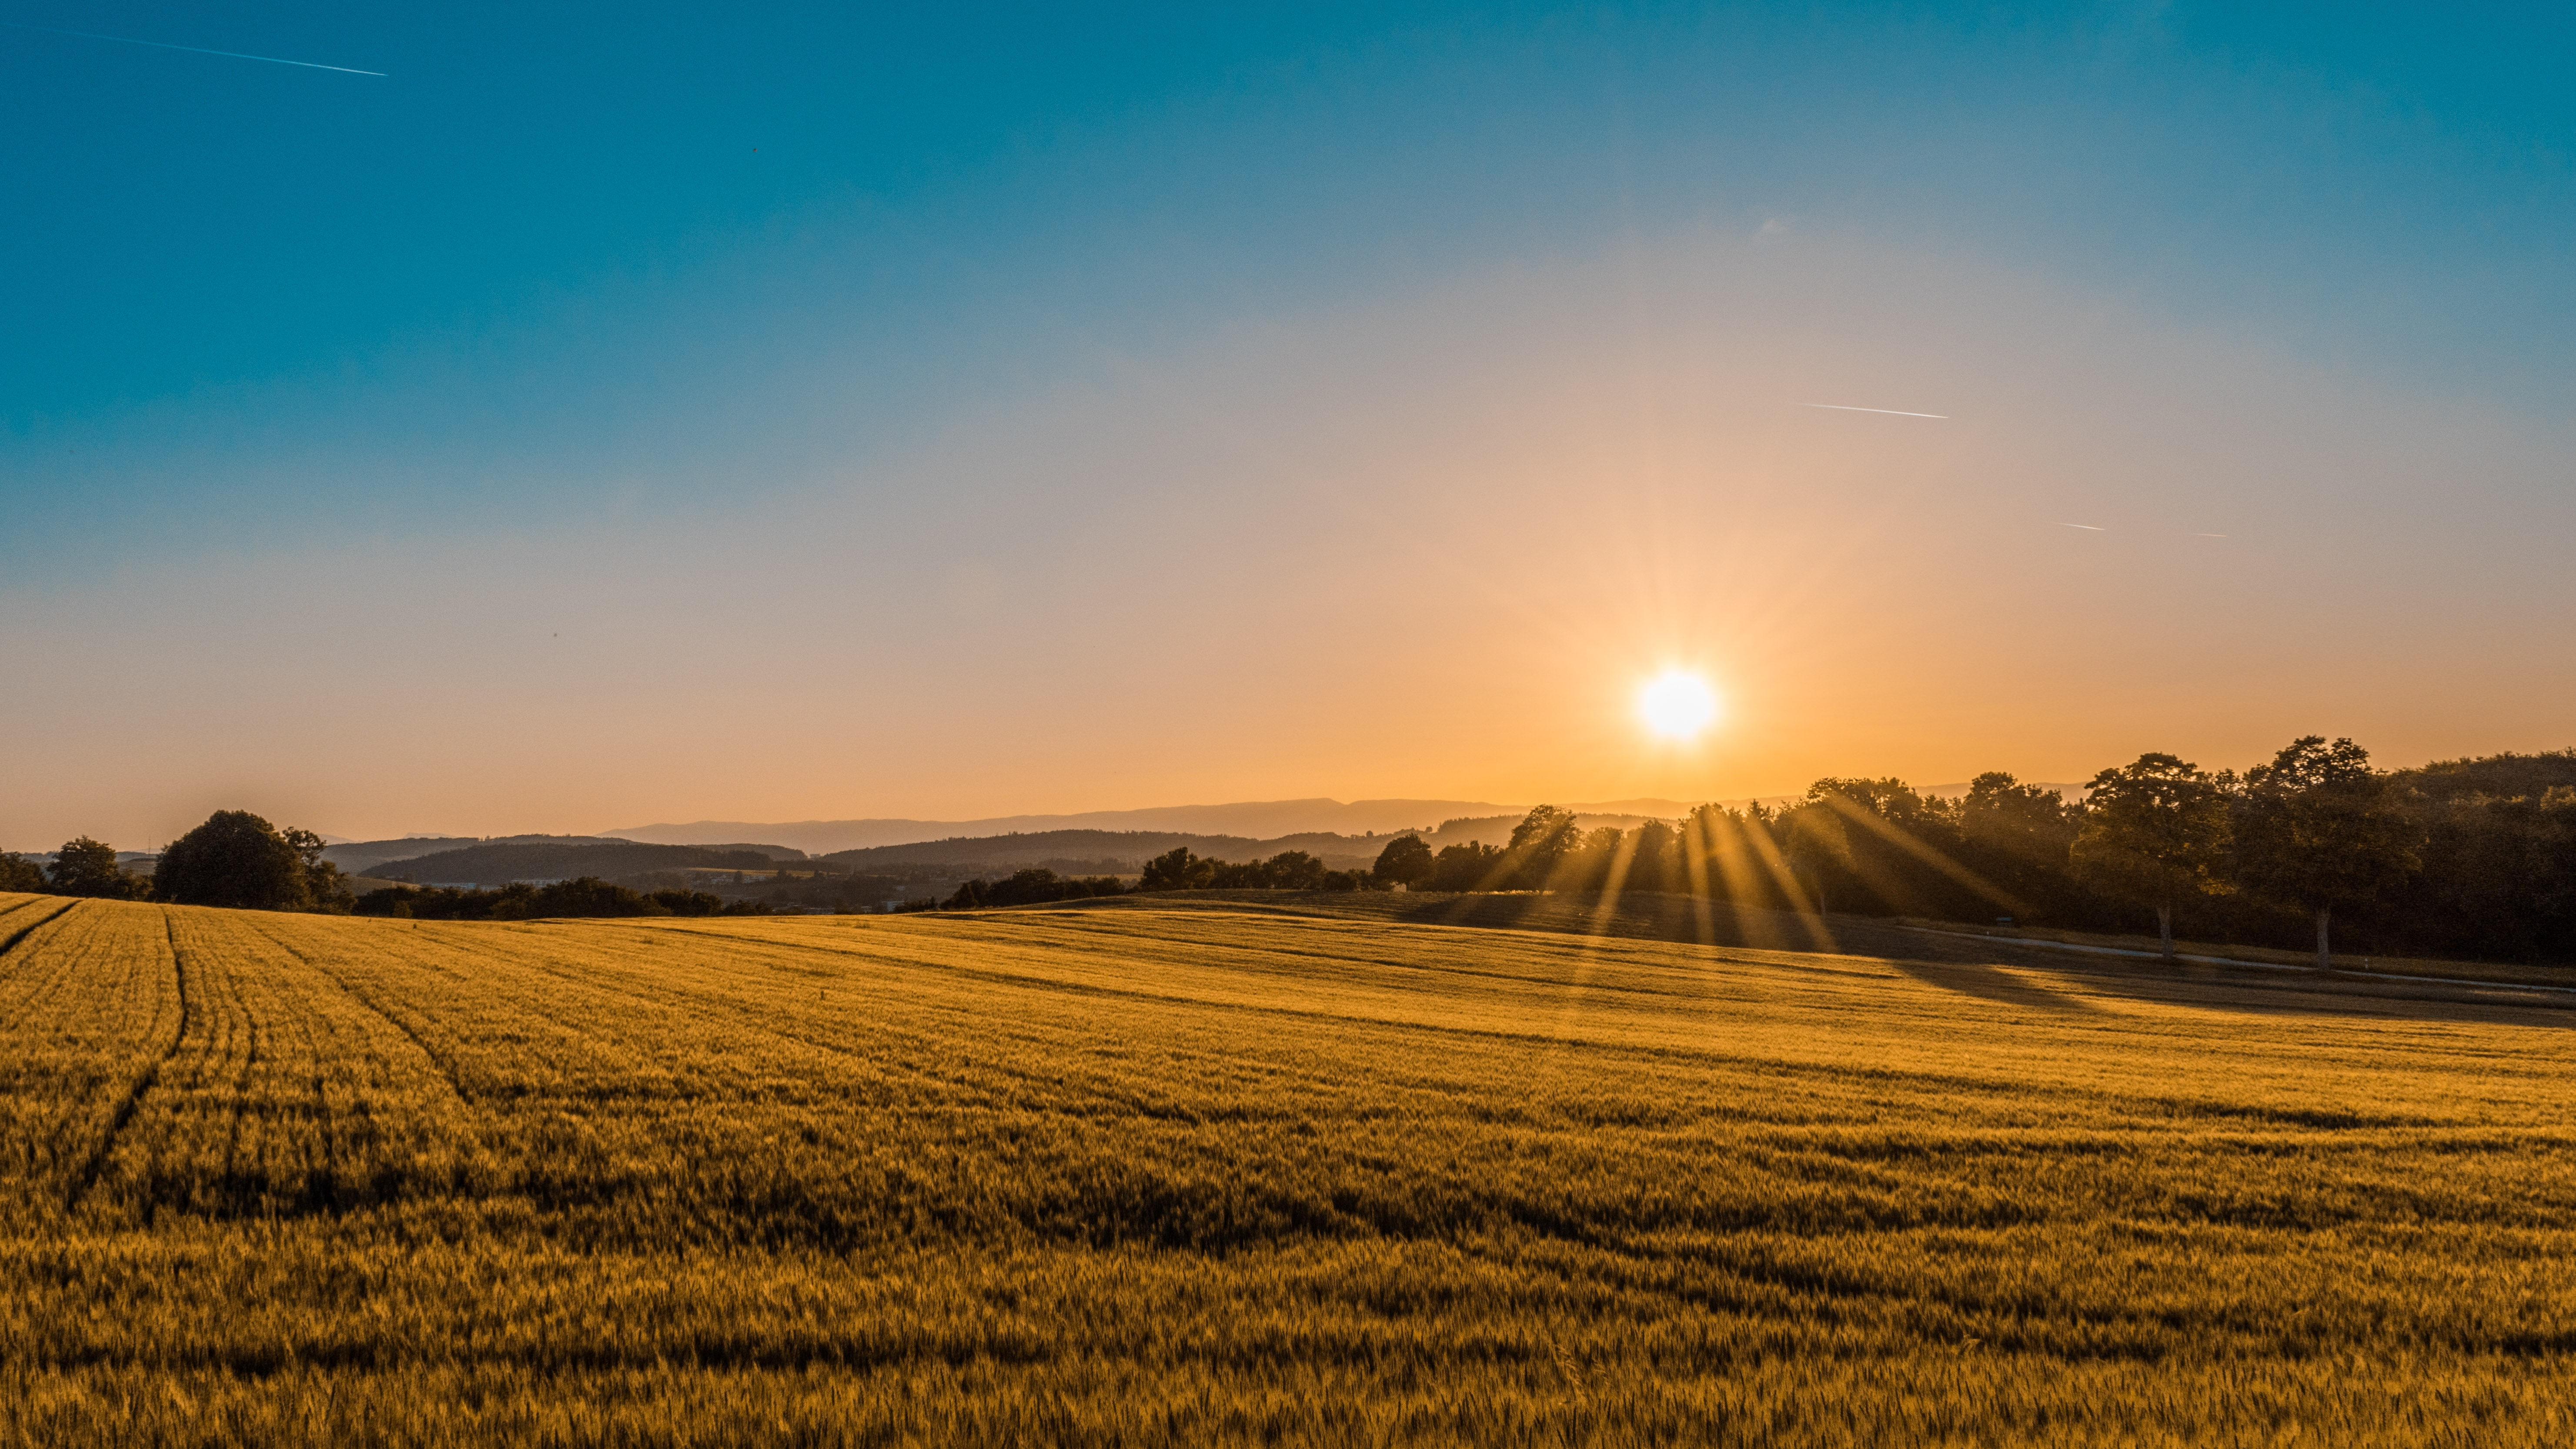
Photo by <a href="https://unsplash.com/@federicorespini?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Federico Respini</a> on <a href="https://unsplash.com/s/photos/sunrise?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>  

### So What Can the Libraries Do?

Undeterred by suns rising and cockerels crowing I set off in search of something that was already out there that might be able to perform the magic of causal discovery based on the data.

There is an algorithm called "NOTEARS" that does claim to be able to implement causal discovery, so let's give it a try and see what it can do ...

In [2]:
df_smallpox_data = pd.read_csv("data/smallpox_data.csv")
df_smallpox_data.value_counts().reset_index().rename({0:"Count"}, axis=1)

Vaccination?  Reaction?  Smallpox?  Death?   Count
0             1          0          0       0  980100
1             1          1          0       0    9801
2             0          0          0       0    9800
3             0          0          1       0     160
4             1          1          0       1      99
5             0          0          1       1      40

This dataset is modeling the cause-and-effect relationships in smallpox vaccinations. Let's run the NOTEARS algorithm against it and see what it can do ...

In [3]:
from causalnex.structure.notears import from_pandas

notears_model = from_pandas(df_smallpox_data, w_threshold=0.1)
list(notears_model.edges)

[('Reaction?', 'Vaccination?'),
 ('Smallpox?', 'Reaction?'),
 ('Death?', 'Reaction?'),
 ('Death?', 'Smallpox?')]

If we were to visualse the results produced by NOTEARS it would look like this ...

<div>
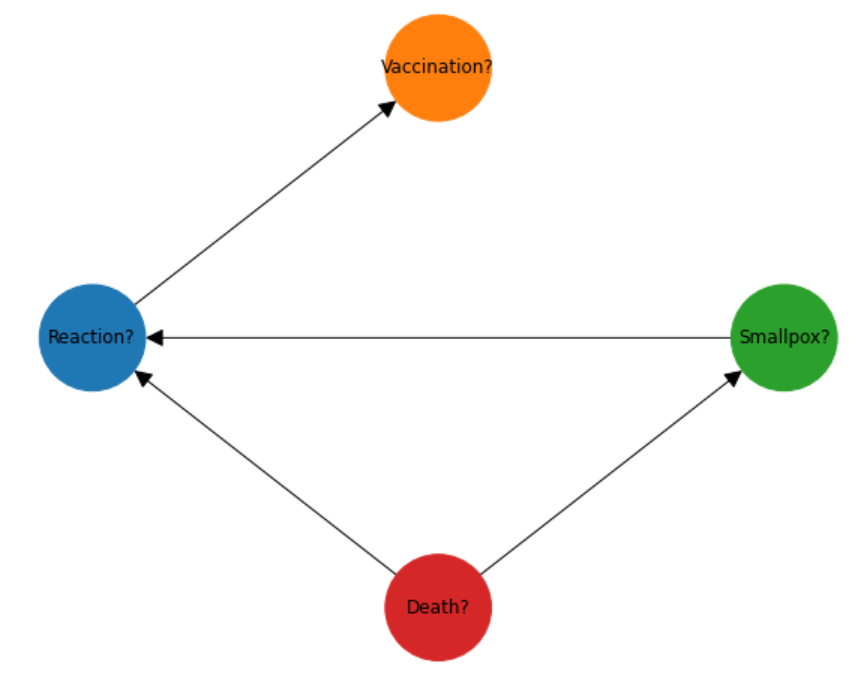
</div>

It doesn't look very good does it? According to NOTEARS death is causing Smallpox. The temporal aspect tells us that smallpox comes first so it cannot be caused by death. Nor can smallpox cause the reaction (the vaccine causes the reaction) and the reaction certainly cannot cause the vaccination.

Using the knowledge of domain experts we can easily establish that the vaccination has a causal effect on whether the patient has a reaction and whether they go on to develop the disease and the reaction and smallpox both have a causal link with death ...

<div>
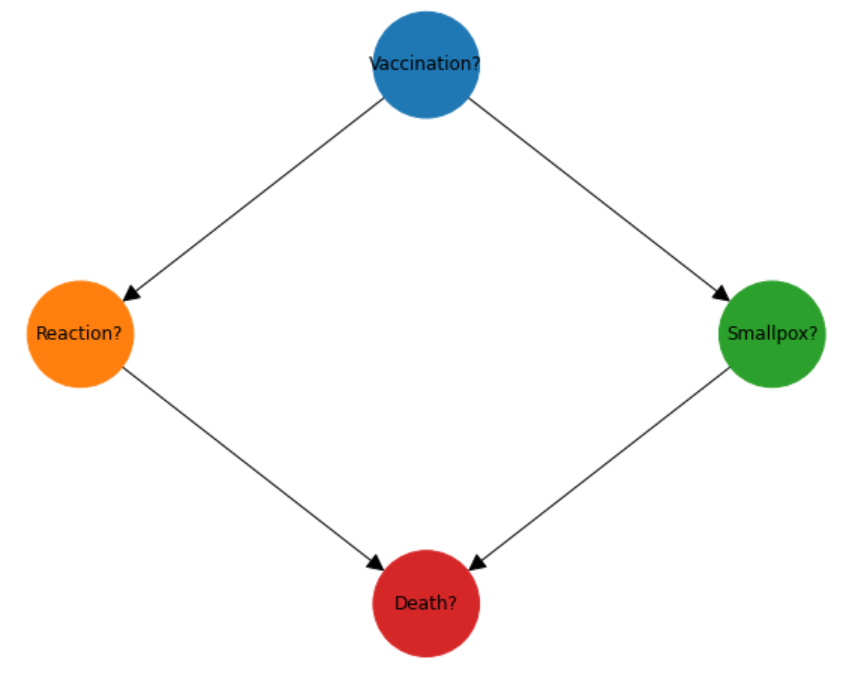
</div>

So, we have established that even in a very simple causal model the NOTEARS causal discovery algorithm does not produce correct results. Also, a reader of one of my previous articles pointed out that NOTEARS does not work in Python 3.9 and as I am about to upgrade this is another big problem.

If you want to read more about the unsuitability of NOTEARS for causality here is an excellent academic paper - https://arxiv.org/pdf/2104.05441.pdf (Marcus Kaiser and  Maksim Sipos).

Before we give up on fully automated causal discovery, let's take a look at an alterative to NOTEARS, the "Lasso" algorithm -

In [4]:
df_earnings = pd.read_csv("data/graduate_earnings.csv")
df_earnings.head()

age  hours-per-week  hasGraduateDegree  inRelationship  isWhite  isFemale  \
0   39              40                  0               0        1         0   
1   50              13                  0               1        1         0   
2   38              40                  0               0        1         0   
3   53              40                  0               1        0         0   
4   37              40                  1               0        1         1   

   greaterThan50k  
0               0  
1               0  
2               0  
3               0  
4               0

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


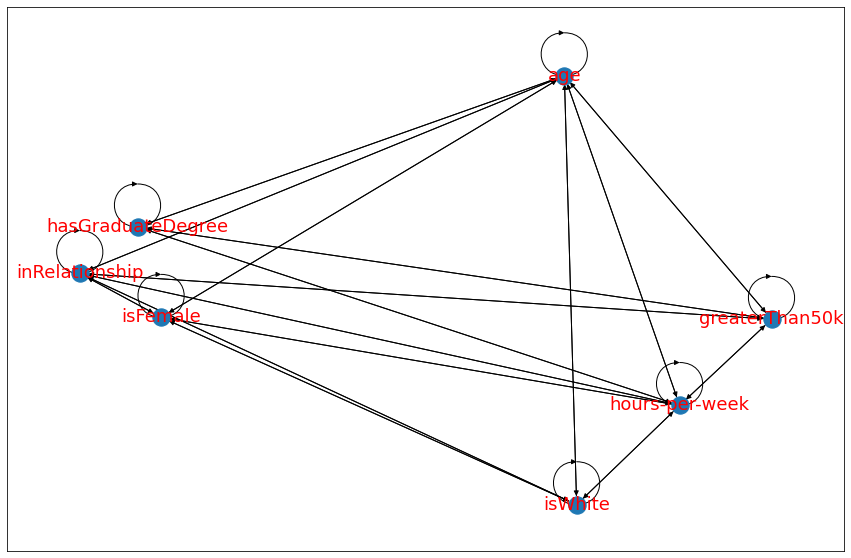

In [5]:
import cdt
import networkx as nx
import matplotlib.pyplot as plt

glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(df_earnings)

fig=plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

Oh dear, Lasso is a disaster! It has predcted that everything is causing everything else and that the nodes cause themselves as well!

My final attempts were to try the GES, GIES and LINGAM algorithms but these all require R libraries. I do not use R and even if I did manage to get the configuration right I would never be able to create portable code that other data scientists could use.

The causal discovery libraries and algorithms that are available do not work and this has re-enforced the view expressed in "The Book of Why" i.e. that causality cannot be reverse engineered from data alone.

This conclusion led to me developing my own approach ...

### The Solution: Augmented Correlative Discovery

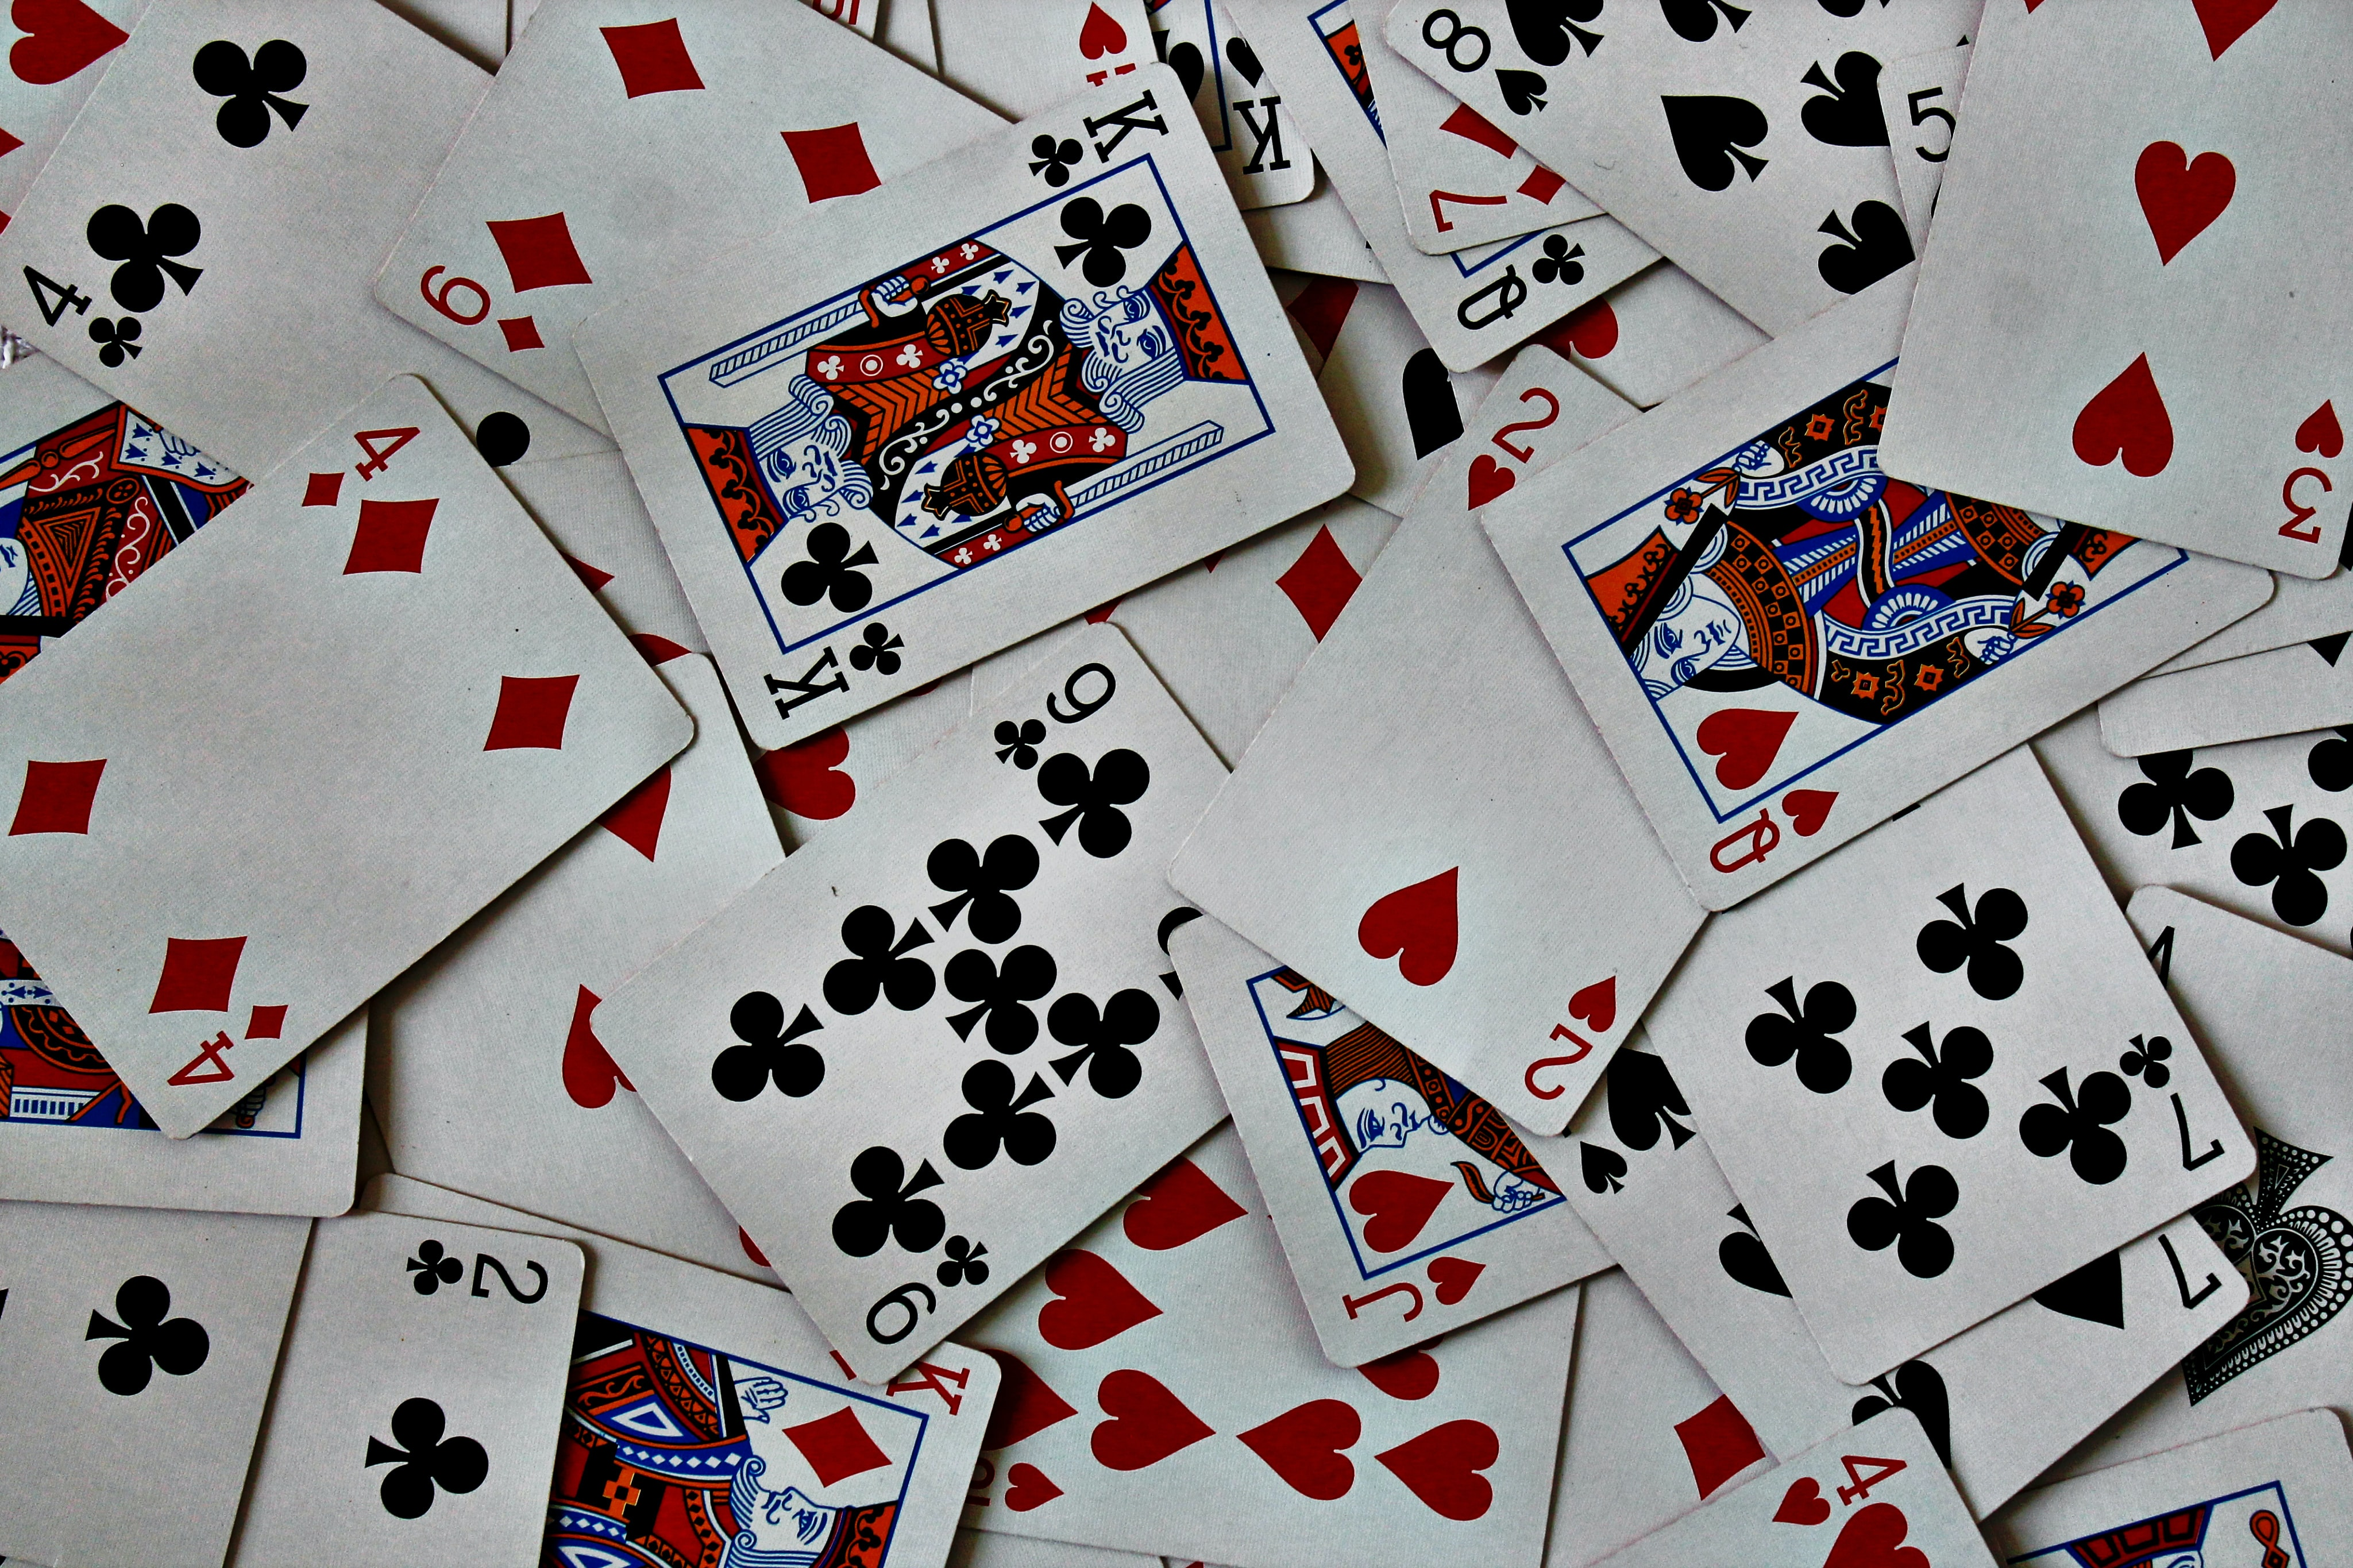

Photo by <a href="https://unsplash.com/@amandagraphc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Amanda Jones</a> on <a href="https://unsplash.com/s/photos/card-game?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

Cards on the table, I have not written a causal discovery algorithm. Rather my algorithm implements correlative discovery with a twist (no pun intended!).

When I had given up on the causal discovery libraries I still needed a way to visualise causation as a starting point for the conversation with domain experts. 

I reasoned that I could calculate the correlations between the features / nodes easily and that this would at least be a good starting point.

I developed my thinking as follows - in causal discovery models we usually identify the "effect" i.e. the data feature we are interested in (like the "target" in machine learning predictions). In the smallpox example this is "Death?", and in the graduate earnings example it is earnings "greaterThank50k". 

Therefore if there are correlations between any feature and the "effect" the causal direction must be from the other features to the effect as it is at the "end-of-the-line".

My next step was to develop a recursive algorithm that can be visualised as follows ...

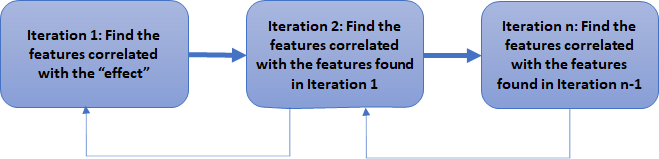

Duplicates and bi-directional links must be forceably excluded. I also wanted to be able to explicitly include or exclude connections (edges) and to explictly exclude features (nodes).

These are the 10 lines of recursive Python code that I came up with to implement causal discovery ...

In [6]:
def discover(data : pd.DataFrame, root_nodes : list, predefined_edges : list, excluded_edges : list, excluded_nodes : list, threshold : float = 0.1, iterations : int = 3) -> list: #pylint: disable="dangerous-default-value"
    if iterations == 0:
        return [(node, root_node) for (node, root_node) in predefined_edges if node not in excluded_nodes and root_node not in excluded_nodes]

    # Non-numeric data types must be label encoded so that they can be evaluated using .corr()
    data_encoded = data.copy(deep=True) 
    for col in data_encoded.select_dtypes(exclude=[np.number]):
        data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

    for root_node in root_nodes:
        ds_correlated_nodes = data_encoded.corr()[root_node].abs().sort_values(ascending=False)[1:]
        ds_correlated_nodes = ds_correlated_nodes[ds_correlated_nodes >= threshold]

        predefined_edges.extend([(node, root_node) for node in list(ds_correlated_nodes.index) if (root_node, node) not in predefined_edges and (node, root_node) not in predefined_edges and (node, root_node) not in excluded_edges and (root_node, node) not in excluded_edges])

    return discover(data=data, root_nodes=list(ds_correlated_nodes.index), predefined_edges=predefined_edges, excluded_edges=excluded_edges, excluded_nodes=excluded_nodes, threshold=threshold, iterations=iterations-1)

### The Solution in Action

To show how the solution works I have selected some data on hotel bookings cancellation data. This raw data has a public use license and can be found here - https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010 (Antonio, Almeida and Nunes, 2019)

Let's start by reading in the data and taking a peek at the correlations ...

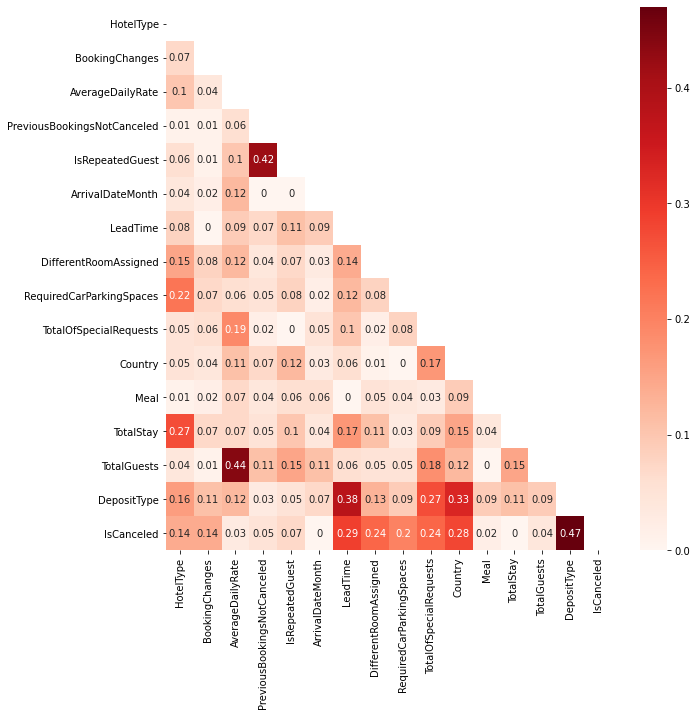

In [7]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from graphviz import Digraph
from IPython.display import SVG

def plot_correlation(df_data : pd.DataFrame, fig_size : tuple = (10, 10), decimal_places : int = 2):
    # Non-numeric data types must be label encoded so that they can be evaluated using .corr()
    df_encoded = df_data.copy(deep=True)
    for col in df_encoded.select_dtypes(exclude=[np.number]):
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

    plt.figure(figsize=fig_size)
    mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))
    sns.heatmap(round(df_encoded.corr().abs(), decimal_places), annot=True, cmap='Reds', mask=mask)
    plt.show()  

columns = ["HotelType", "BookingChanges", "AverageDailyRate", "PreviousBookingsNotCanceled", "IsRepeatedGuest", "ArrivalDateMonth", "LeadTime", "DifferentRoomAssigned", "RequiredCarParkingSpaces", "TotalOfSpecialRequests", "Country", "Meal", "TotalStay", "TotalGuests", "DepositType", "IsCanceled"]
df_hotel = pd.read_csv("data/hotel_bookings_full.csv").loc[:, columns]    
plot_correlation(df_hotel)

The fist run involves keeping the iterations down to 1 so we are just looking at the correlations (which should be causal) with the "effect" i.e. whether the hotel booking is cancelled or not ...

In [8]:
def display_digraph(edges : list):
    digraph = Digraph()
    digraph.edges(edges)
    digraph.render("digraph", format="svg")
    display(SVG("digraph.svg"))  

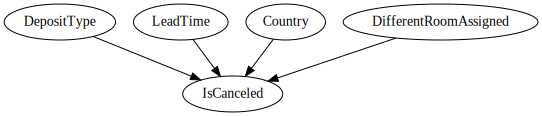

In [9]:
edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=[], 
                 excluded_edges=[], 
                 excluded_nodes=[], 
                 threshold=0.24, 
                 iterations=1)

display_digraph(edges)

OK, that's not a bad start, let's increase the number of iterations / recursions / layers to 3, tweak the correlation threshold a bit and see what we get ...

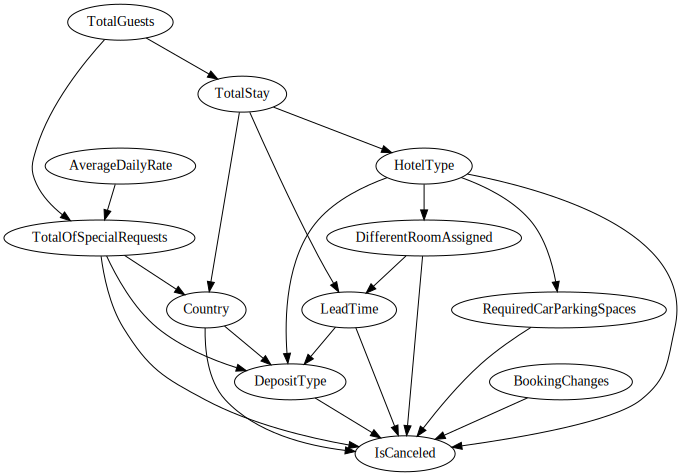

In [10]:
edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=[], 
                 excluded_edges=[], 
                 excluded_nodes=[], 
                 threshold=0.135, 
                 iterations=3)

display_digraph(edges)

OK, not too bad either, but it is a bit "busy" so the next step is to exclude some of the nodes we suspect might be causing some of the noise (note: in a real-world business case we would be talking to our domain experts at this stage).

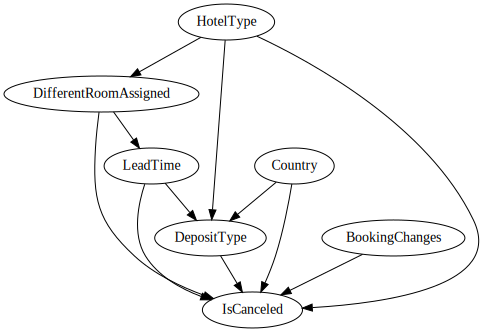

In [11]:
excluded_nodes = ["TotalOfSpecialRequests", "RequiredCarParkingSpaces", "TotalStay"]

edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=[], 
                 excluded_edges=[], 
                 excluded_nodes=excluded_nodes, 
                 threshold=0.135, 
                 iterations=3)

display_digraph(edges)

This is starting to look better. Remember that the my algorithm is confident that links to "IsCancelled" are causal because it is the "effect", hence nothing comes after it.

The other layers of the tree are just correlative though, the direction of the arrows were added based imply on the order that the algorithm found them in.

Working with the domain experts (or my own experience of hotel bookings in this instance!) I noticed the following -

- The link from "DifferentRoomAssigned" to "LeadTime is in the wrong direction because a long booking lead time increases the probability that the booking will change and not vice-versa.
- The correlation between "BookingChanges" and "DifferentRoomAssigned" is below the threshold but it may be a significant causally so it needs to be included.

The next attempt instructs the algorithm to make these corrections -

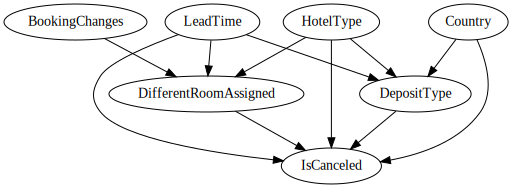

In [12]:
excluded_nodes = ["TotalOfSpecialRequests", "RequiredCarParkingSpaces", "TotalStay"]
corrected_edges = [("LeadTime", "DifferentRoomAssigned"), ("BookingChanges", "DifferentRoomAssigned")]
excluded_edges = [("BookingChanges", "IsCanceled")]

edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=corrected_edges, 
                 excluded_edges=excluded_edges, 
                 excluded_nodes=excluded_nodes, 
                 threshold=0.135, 
                 iterations=3)

display_digraph(edges)

### The Final Iteration: Accounting for "Unobserved Confounders"
An "unobserved confounder" is a factor that we believe is impacting on our causal model by providing a link between some of the nodes, but that has not been measured and hence has not been included in the diagram.

My experience of going to hotels and my knowledge of the hotels dataset made me suspect that there is an "unobserved confounder" affecting the hotels dataset. 

There are two hotels in the data - a "city" hotel and a "resort" hotel. This is leading me to hypothesise that the unobserved confounder in this causal model is the <b>"reason for the hotel stay"</b>. 

My hypothesis is that <b>holiday-makers primarily stay at the resort hotel and business people and city-breakers primarily stay at the city hotel</b>. 

Futhermore I have hypothesised that these two groups have different behaviours and that this is the "unobserved confounder" (unobserved because the data does not capture the reason for the stay).

NOTEARS and other similar algorithms cannot account for "unobserved confounders" but the algorithm I have developed can take them into account by having them explicitly included as follows ...

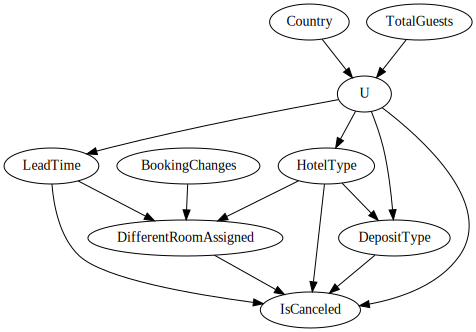

In [13]:
excluded_nodes = ["TotalOfSpecialRequests", "RequiredCarParkingSpaces", "TotalStay"]
corrected_edges = [("LeadTime", "DifferentRoomAssigned"), ("BookingChanges", "DifferentRoomAssigned")]
excluded_edges = [("BookingChanges", "IsCanceled"), ("LeadTime", "DepositType"), ("Country", "IsCanceled"), ("Country", "DepositType")]
unobserved_confounders = [("U", "HotelType"), ("U", "LeadTime"), ("U", "TotalStay"), ("U", "IsCanceled"), ("U", "DepositType"), ("Country", "U"), ("TotalGuests", "U")]

edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=corrected_edges + unobserved_confounders, 
                 excluded_edges=excluded_edges, 
                 excluded_nodes=excluded_nodes, 
                 threshold=0.135, 
                 iterations=3)

display_digraph(edges)

This is a now plausible, readable and understandable visualisation for the causality in the hotel data that I would be confident to explore and refine with the domain experts. These are the key points ...

- There is an "unobserved confounder" which is the primary reason for the stay (holiday vs. business / city break).
- The "Country" has a causal effect on the unobserved confounder - those travelling from some countries are more likely to be on holiday.
- The same applies to "TotalGuests". Large parties are more likely to be holidaying, singles to be on business trips and doubles on city breaks.
- The unobserved "reason for stay" has a causal effect on "LeadTime", "HotelType" and "DepositType".
- "LeadTime", "DifferentRoomAssigned", "HotelType", "DepositType" and "Reason" (U) all have a causal effect on "IsCanceled"

### Conclusion

<b>Causal Discovery</b> is the process of going beyond correlative links to discovering causal links (i.e. on which end of the a correlative line does the arrow belong). This is not possible, or at least prohibitively difficult, to automate with algorithms like NOTEARS because the answers do not exist in the data alone.

However, there is still a critical need to visualise causation so that it can be explored with domain experts in order to build a causal diagram (also refered to as a Directed Acyclic Graph or DAG).

In this article an algorithm based on augmenting correlative discovery has been proposed using just 10 lines of Python code that can be used with domain experts to repeatedly refine the sensitivity (threshold), correct, add or remove the links (arrows) and exclude irrelevant nodes.

In future articles these causal diagrams will be used to build a full blown causal machine learning model that can  answer "what-if" questions to complex, real-world questions from customers and business leaders.

### References

#### Sun Rising / Cockerel Crowing Data
- Source: synthetic data created by the author
- Reference: https://towardsdatascience.com/how-to-generate-synthetic-data-for-any-causal-inference-project-in-less-than-10-lines-of-code-158688a89349
- License: https://creativecommons.org/licenses/by/4.0/

#### Smallpox Data
- Source: synthetic data created by the author
- Reference: https://towardsdatascience.com/how-to-generate-synthetic-data-for-any-causal-inference-project-in-less-than-10-lines-of-code-158688a89349
- License: https://creativecommons.org/licenses/by/4.0/

#### Graduate Earnings / Census Income Data
- Source: https://archive.ics.uci.edu/ml/datasets/census+income
- Reference: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
- License: Public Use with a Reference: https://archive.ics.uci.edu/ml/citation_policy.html

#### Hotel Bookings Data
- Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191
- Reference: Antonio, Almeida and Nunes, 2019
- License: Open access under a Creative Commons license (https://creativecommons.org/licenses/by/4.0/)



